# DLCV Assignment 2


<b>Name:</b>  Raja Sekhar M <br>
<b>SR No:</b> 6000014806

## Experiment 1

In [11]:
import torch
import torchvision
import torchvision.transforms as transforms

import engine
from model import ViT
from utils import plot_learning_curves
import utils

In [6]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [7]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)
#classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [8]:
len(trainset), len(testset)

(50000, 10000)

In [9]:
model = ViT(
    img_size=32,
    patch_size=4,
    num_classes=10,
    num_transformer_layers=6,
    embedding_dim=64,
    num_heads=4,
    mlp_size=128
)
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)
loss_fn = torch.nn.CrossEntropyLoss()
results = engine.train(model=model,
             train_dataloader=trainloader,
             test_dataloader=testloader,
             optimizer=optimizer,
             loss_fn=loss_fn,
             device=device,
             epochs=10)

 10%|█         | 1/10 [08:00<1:12:08, 480.93s/it]

Epoch: 1 | train_loss: 1.8693 | train_acc: 0.3163 | test_loss: 1.6230 | test_acc: 0.4208


 20%|██        | 2/10 [1:23:36<6:22:06, 2865.85s/it]

Epoch: 2 | train_loss: 1.5783 | train_acc: 0.4294 | test_loss: 1.4572 | test_acc: 0.4744


 30%|███       | 3/10 [1:38:49<3:50:20, 1974.29s/it]

Epoch: 3 | train_loss: 1.4578 | train_acc: 0.4746 | test_loss: 1.3776 | test_acc: 0.5012


 40%|████      | 4/10 [1:47:07<2:19:09, 1391.60s/it]

Epoch: 4 | train_loss: 1.3695 | train_acc: 0.5046 | test_loss: 1.3590 | test_acc: 0.5168


 50%|█████     | 5/10 [1:55:52<1:29:55, 1079.02s/it]

Epoch: 5 | train_loss: 1.3061 | train_acc: 0.5304 | test_loss: 1.2465 | test_acc: 0.5523


 60%|██████    | 6/10 [2:04:46<59:34, 893.55s/it]   

Epoch: 6 | train_loss: 1.2543 | train_acc: 0.5491 | test_loss: 1.2498 | test_acc: 0.5480


 70%|███████   | 7/10 [2:20:49<45:48, 916.25s/it]

Epoch: 7 | train_loss: 1.2088 | train_acc: 0.5687 | test_loss: 1.2357 | test_acc: 0.5650


 80%|████████  | 8/10 [2:29:21<26:15, 787.64s/it]

Epoch: 8 | train_loss: 1.1734 | train_acc: 0.5804 | test_loss: 1.1805 | test_acc: 0.5734


 90%|█████████ | 9/10 [2:37:50<11:40, 700.68s/it]

Epoch: 9 | train_loss: 1.1399 | train_acc: 0.5912 | test_loss: 1.1708 | test_acc: 0.5806


100%|██████████| 10/10 [2:46:40<00:00, 1000.01s/it]

Epoch: 10 | train_loss: 1.1059 | train_acc: 0.6034 | test_loss: 1.1811 | test_acc: 0.5823


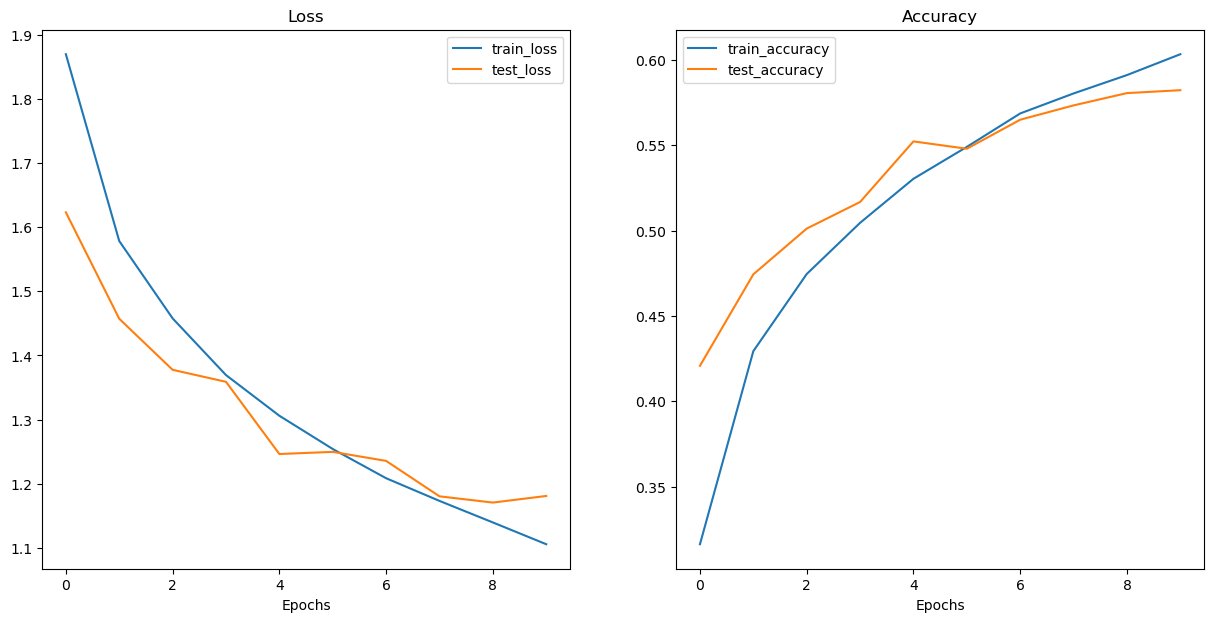

In [13]:
utils.plot_learning_curves(results)

## Experiment 2

In [ ]:
trainset_5percent = trainset[:int(0.05 * len(trainset))]
trainset_10percent = trainset[:int(0.1 * len(trainset))]
trainset_25percent = trainset[:int(0.25 * len(trainset))]
trainset_50percent = trainset[:int(0.5 * len(trainset))]

trainloader_5percent = torch.utils.data.DataLoader(trainset_5percent, batch_size=4, shuffle=True, num_workers=2)
trainloader_10percent = torch.utils.data.DataLoader(trainset_10percent, batch_size=4, shuffle=True, num_workers=2)
trainloader_25percent = torch.utils.data.DataLoader(trainset_25percent, batch_size=4, shuffle=True, num_workers=2)
trainloader_50percent = torch.utils.data.DataLoader(trainset_50percent, batch_size=4, shuffle=True, num_workers=2)

results_vs_datasize = {'5%_data': None, '10%_data': None, '25%_data': None, '50%_data': None, '100%_data': None}

data_sizes = ['5%_data', '10%_data', '25%_data', '50%_data', '100%_data']
trainloaders = [trainloader_5percent, trainloader_10percent, trainloader_25percent, trainloader_50percent, trainloader]
for i in range(len(data_sizes)):
    data_size = data_sizes[i]
    trainloader = trainloaders[i]
    model = ViT(
        img_size=32,
        patch_size=4,
        num_classes=10,
        num_transformer_layers=6,
        embedding_dim=64,
        num_heads=4,
        mlp_size=128
    ).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)
    results = engine.train(model=model,
                 train_dataloader=trainloader,
                 test_dataloader=testloader,
                 optimizer=optimizer,
                 loss_fn=loss_fn,
                 device=device,
                 epochs=10)
    results_vs_datasize[data_size] = results


## Experiment 3

In [ ]:
results_vs_patch_size = {'p_size=4': None, 'p_size=8': None, 'p_size=16': None}

for patch_size in ['4', '8', '16']:
    model = ViT(
        img_size=32,
        patch_size=int(patch_size),
        num_classes=10,
        num_transformer_layers=6,
        embedding_dim=64,
        num_heads=4,
        mlp_size=128
    ).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)
    results = engine.train(model=model,
                 train_dataloader=trainloader,
                 test_dataloader=testloader,
                 optimizer=optimizer,
                 loss_fn=loss_fn,
                 device=device,
                 epochs=10)
    results_vs_patch_size[f'p_size={patch_size}'] = results

## Experiment 4

In [ ]:
results_vs_num_heads = {'n_heads=4': None, 'n_heads=8': None, 'n_heads=12': None}

for num_heads in ['4', '8', '12']:
    model = ViT(
        img_size=32,
        patch_size=4,
        num_classes=10,
        num_transformer_layers=6,
        embedding_dim=64,
        num_heads=int(num_heads),
        mlp_size=128
    ).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)
    results = engine.train(model=model,
                 train_dataloader=trainloader,
                 test_dataloader=testloader,
                 optimizer=optimizer,
                 loss_fn=loss_fn,
                 device=device,
                 epochs=10)
    results_vs_num_heads[f'n_heads={num_heads}'] = results

## Experiment 5

## Experiment 6